
















































## Segmenting and Clustering Neighborhoods in Toronto

## Introduction

We will convert addresses to their equivalent latitude and longitude values.Use the Foursquare API to explore neighborhoods in the city of Toronto. We will use the **explore** function to obtain the most common location categories in each neighborhood, then group the neighborhoods with the _k_-means clustering algorithm and finally use the Folium library to view Toronto city neighborhoods and its emerging clusters.



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Web Scraping Table Toronto</a>

2.  <a href="#item2">Geographic coordinates the Toronto</a>

3.  <a href="#item3">Exploring downtown Toronto neighborhoods</a>

4.  <a href="#item4">Clustering Downtown Toronto's Neighborhoods</a>

5.  <a href="#item5">Examine Clusters</a>  
    </font>
    </div>


## 1.Web Scraping Table Toronto

- Let's retrieve URL and create a Beautiful soup object

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
URL= "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html_data=requests.get(URL).text

In [3]:
soup = BeautifulSoup(html_data,"html5lib")

In [4]:
tables= soup.find_all('table')
len(tables)

for index,table in enumerate(tables):
    if ("x" in str(table)):
        table_index = index
print(table_index)

2


In [5]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

### 1.1 Table with postcodes of Toronto neighborhoods

In [6]:
df.head(12)

PostalCode           Borough  \
0         M3A        North York   
1         M4A        North York   
2         M5A  Downtown Toronto   
3         M6A        North York   
4         M7A      Queen's Park   
5         M9A         Etobicoke   
6         M1B       Scarborough   
7         M3B        North York   
8         M4B         East York   
9         M5B  Downtown Toronto   
10        M6B        North York   
11        M9B         Etobicoke   

                                         Neighborhood  
0                                           Parkwoods  
1                                    Victoria Village  
2                           Regent Park, Harbourfront  
3                    Lawrence Manor, Lawrence Heights  
4                       Ontario Provincial Government  
5                                    Islington Avenue  
6                                      Malvern, Rouge  
7                                     Don Mills North  
8                     Parkview Hill, Woodbine Gardens  
9                            Garden District, Ryerson  
10                                          Glencairn  
11  West Deane Park, Princess Gardens, Martin Grov...

In [7]:
df['PostalCode'].duplicated().sum()

0

In [8]:
df.shape

(103, 3)

# 2.Geographic coordinates the Toronto

Now with the postal code dataframe of each neighborhood together with the neighborhood name and the neighborhood name, created, we will use the location data from Foursquare to obtain the latitude and longitude coordinates of each neighborhood.

The csv file that contains the geographic coordinates of each zip code for Toronto neighborhoods.

In [9]:
df2= pd.read_csv("Geospatial_Coordinates.csv")
df2.head(20)

Postal Code   Latitude  Longitude
0          M1B  43.806686 -79.194353
1          M1C  43.784535 -79.160497
2          M1E  43.763573 -79.188711
3          M1G  43.770992 -79.216917
4          M1H  43.773136 -79.239476
5          M1J  43.744734 -79.239476
6          M1K  43.727929 -79.262029
7          M1L  43.711112 -79.284577
8          M1M  43.716316 -79.239476
9          M1N  43.692657 -79.264848
10         M1P  43.757410 -79.273304
11         M1R  43.750072 -79.295849
12         M1S  43.794200 -79.262029
13         M1T  43.781638 -79.304302
14         M1V  43.815252 -79.284577
15         M1W  43.799525 -79.318389
16         M1X  43.836125 -79.205636
17         M2H  43.803762 -79.363452
18         M2J  43.778517 -79.346556
19         M2K  43.786947 -79.385975

- Joining dataframes

In [11]:
# Renamed the columns
df2=df2.rename(columns={'Postal Code':'PostalCode'} )

df3=pd.merge(df, df2, on=["PostalCode"], how="inner")
df3.head(20)

PostalCode           Borough  \
0         M3A        North York   
1         M4A        North York   
2         M5A  Downtown Toronto   
3         M6A        North York   
4         M7A      Queen's Park   
5         M9A         Etobicoke   
6         M1B       Scarborough   
7         M3B        North York   
8         M4B         East York   
9         M5B  Downtown Toronto   
10        M6B        North York   
11        M9B         Etobicoke   
12        M1C       Scarborough   
13        M3C        North York   
14        M4C         East York   
15        M5C  Downtown Toronto   
16        M6C              York   
17        M9C         Etobicoke   
18        M1E       Scarborough   
19        M4E      East Toronto   

                                         Neighborhood   Latitude  Longitude  
0                                           Parkwoods  43.753259 -79.329656  
1                                    Victoria Village  43.725882 -79.315572  
2                           Regent Park, Harbourfront  43.654260 -79.360636  
3                    Lawrence Manor, Lawrence Heights  43.718518 -79.464763  
4                       Ontario Provincial Government  43.662301 -79.389494  
5                                    Islington Avenue  43.667856 -79.532242  
6                                      Malvern, Rouge  43.806686 -79.194353  
7                                     Don Mills North  43.745906 -79.352188  
8                     Parkview Hill, Woodbine Gardens  43.706397 -79.309937  
9                            Garden District, Ryerson  43.657162 -79.378937  
10                                          Glencairn  43.709577 -79.445073  
11  West Deane Park, Princess Gardens, Martin Grov...  43.650943 -79.554724  
12             Rouge Hill, Port Union, Highland Creek  43.784535 -79.160497  
13                                    Don Mills South  43.725900 -79.340923  
14                                   Woodbine Heights  43.695344 -79.318389  
15                                     St. James Town  43.651494 -79.375418  
16                                 Humewood-Cedarvale  43.693781 -79.428191  
17  Eringate, Bloordale Gardens, Old Burnhamthorpe...  43.643515 -79.577201  
18                  Guildwood, Morningside, West Hill  43.763573 -79.188711  
19                                        The Beaches  43.676357 -79.293031

In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(df3['Borough'].unique()),df3.shape[0]))

The dataframe has 15 boroughs and 103 neighborhoods.


Explore only neighborhoods that contain the word Toronto.


In [13]:
df_toronto = df3[(df3['Borough'].str.contains("Toronto"))].reset_index(drop=True)
df_toronto.head(12)

PostalCode                 Borough  \
0         M5A        Downtown Toronto   
1         M5B        Downtown Toronto   
2         M5C        Downtown Toronto   
3         M4E            East Toronto   
4         M5E        Downtown Toronto   
5         M5G        Downtown Toronto   
6         M6G        Downtown Toronto   
7         M5H        Downtown Toronto   
8         M6H            West Toronto   
9         M4J  East York/East Toronto   
10        M5J        Downtown Toronto   
11        M6J            West Toronto   

                                         Neighborhood   Latitude  Longitude  
0                           Regent Park, Harbourfront  43.654260 -79.360636  
1                            Garden District, Ryerson  43.657162 -79.378937  
2                                      St. James Town  43.651494 -79.375418  
3                                         The Beaches  43.676357 -79.293031  
4                                         Berczy Park  43.644771 -79.373306  
5                                  Central Bay Street  43.657952 -79.387383  
6                                            Christie  43.669542 -79.422564  
7                            Richmond, Adelaide, King  43.650571 -79.384568  
8                        Dufferin, Dovercourt Village  43.669005 -79.442259  
9                                  The Danforth  East  43.685347 -79.338106  
10  Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752  
11                           Little Portugal, Trinity  43.647927 -79.419750

In [14]:
df_toronto[["Borough"]].value_counts()

Borough               
Downtown Toronto          17
Central Toronto            9
West Toronto               6
East Toronto               4
East York/East Toronto     1
East Toronto Business      1
Downtown Toronto Stn A     1
dtype: int64

# 3. Exploring downtown Toronto neighborhoods

#### Use geopy library to get the latitude and longitude values of Toronto City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em> ny_explorer </em>, as shown below.

In [34]:
from geopy.geocoders import Nominatim

address = 'Centro, RJ'

geolocator = Nominatim(user_agent="ny_explorer")

location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {}, are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Centro, RJ, are -22.9043934, -43.1830653.


###  3.1 Creating a Toronto map using latitude and longitude values

In [16]:
import folium
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Downtown Toronto. So let's slice the original dataframe and create a new dataframe of the df_toronto.

In [17]:
df_downtown_toronto = df_toronto[df_toronto['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
df_downtown_toronto.head()

PostalCode           Borough               Neighborhood   Latitude  \
0        M5A  Downtown Toronto  Regent Park, Harbourfront  43.654260   
1        M5B  Downtown Toronto   Garden District, Ryerson  43.657162   
2        M5C  Downtown Toronto             St. James Town  43.651494   
3        M5E  Downtown Toronto                Berczy Park  43.644771   
4        M5G  Downtown Toronto         Central Bay Street  43.657952   

   Longitude  
0 -79.360636  
1 -79.378937  
2 -79.375418  
3 -79.373306  
4 -79.387383

Let's get the geographical coordinates of Downtown Toronto.

In [19]:
address = 'Downtown Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate Downtown Toronto, are {}, {}.'.format(latitude, longitude))

The geograpical coordinate Downtown Toronto, are 43.6563221, -79.3809161.


####  Let's see Downtown Toronto and its neighborhoods.

In [20]:
map_downtown_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_downtown_toronto['Latitude'], df_downtown_toronto['Longitude'], df_downtown_toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown_toronto)  
    
map_downtown_toronto

We will use the Foursquare API to explore the neighborhoods of downtown Toronto.

#### Define Foursquare Credentials and Version

In [24]:
CLIENT_ID = 'P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO' # your Foursquare ID
CLIENT_SECRET = '3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H' # your Foursquare Secret
ACCESS_TOKEN = "L5FWYDVVHZXJ4GKNOAD45X22X5MVYZJIFJHE1YJXFGDFB4YN" # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO
CLIENT_SECRET:3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H


###  3.2 Explore a neighborhood, let's choose the first one on the dataframe.
Get the neighborhood's name


In [25]:
df_downtown_toronto.loc[0,'Neighborhood']

'Regent Park, Harbourfront'

In [26]:
neighborhood_latitude = df_downtown_toronto.loc[0,'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_downtown_toronto.loc[0,'Longitude'] # neighborhood longitude value

neighborhood_name = df_downtown_toronto.loc[0,'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


Let's see the top 100 locations that are on Marble Hill within a radius of 500 meters.

In [27]:
LIMIT = 100
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [31]:
results = requests.get(url).json()
#results

In [32]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Let's clean up the json and structure it on a _pandas_ dataframe.

In [30]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

NameError: name 'json_normalize' is not defined

And how many venues were returned by Foursquare?

In [308]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


### 3.3 Exploring more than one neighborhood in Downtown Toronto.

Let's create a function to repeat the same process to all the neighborhoods in Downtown Toronto

In [309]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called _toronto_downtown_venues_.

In [310]:
downtown_venues = getNearbyVenues(names=df_downtown_toronto['Neighborhood'],
                                   latitudes=df_downtown_toronto['Latitude'],
                                   longitudes=df_downtown_toronto['Longitude']
                                  )

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [311]:
print(toronto_downtown_venuess.shape)
toronto_downtown_venuess.head()

(1093, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Regent Park, Harbourfront               43.65426              -79.360636   
1  Regent Park, Harbourfront               43.65426              -79.360636   
2  Regent Park, Harbourfront               43.65426              -79.360636   
3  Regent Park, Harbourfront               43.65426              -79.360636   
4  Regent Park, Harbourfront               43.65426              -79.360636   

                    Venue  Venue Latitude  Venue Longitude  \
0        Roselle Desserts       43.653447       -79.362017   
1           Tandem Coffee       43.653559       -79.361809   
2  Cooper Koo Family YMCA       43.653249       -79.358008   
3     Body Blitz Spa East       43.654735       -79.359874   
4          Impact Kitchen       43.656369       -79.356980   

        Venue Category  
0               Bakery  
1          Coffee Shop  
2  Distribution Center  
3                  Spa  
4           Restaurant

Let's check how many venues were returned for each neighborhood

In [312]:
downtown_venues.groupby("Neighborhood").count()

Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            57   
CN Tower, King and Spadina, Railway Lands, Harb...                     15   
Central Bay Street                                                     66   
Christie                                                               16   
Church and Wellesley                                                   74   
Commerce Court, Victoria Hotel                                        100   
First Canadian Place, Underground city                                100   
Garden District, Ryerson                                              100   
Harbourfront East, Union Station, Toronto Islands                     100   
Kensington Market, Chinatown, Grange Park                              64   
Regent Park, Harbourfront                                              46   
Richmond, Adelaide, King                                               92   
Rosedale                                                                4   
St. James Town                                                         82   
St. James Town, Cabbagetown                                            44   
Toronto Dominion Centre, Design Exchange                              100   
University of Toronto, Harbord                                         33   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Berczy Park                                                             57   
CN Tower, King and Spadina, Railway Lands, Harb...                      15   
Central Bay Street                                                      66   
Christie                                                                16   
Church and Wellesley                                                    74   
Commerce Court, Victoria Hotel                                         100   
First Canadian Place, Underground city                                 100   
Garden District, Ryerson                                               100   
Harbourfront East, Union Station, Toronto Islands                      100   
Kensington Market, Chinatown, Grange Park                               64   
Regent Park, Harbourfront                                               46   
Richmond, Adelaide, King                                                92   
Rosedale                                                                 4   
St. James Town                                                          82   
St. James Town, Cabbagetown                                             44   
Toronto Dominion Centre, Design Exchange                               100   
University of Toronto, Harbord                                          33   

                                                    Venue  Venue Latitude  \
Neighborhood                                                                
Berczy Park                                            57              57   
CN Tower, King and Spadina, Railway Lands, Harb...     15              15   
Central Bay Street                                     66              66   
Christie                                               16              16   
Church and Wellesley                                   74              74   
Commerce Court, Victoria Hotel                        100             100   
First Canadian Place, Underground city                100             100   
Garden District, Ryerson                              100             100   
Harbourfront East, Union Station, Toronto Islands     100             100   
Kensington Market, Chinatown, Grange Park              64              64   
Regent Park, Harbourfront                              46              46   
Richmond, Adelaide, King                               92              92   
Rosedale                   

Let's find out how many exclusive categories can be selected from all locations returned

In [313]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 207 uniques categories.


###  3.4 Analyzing the categories of each neighborhood in downtown Toronto.

In [314]:
downtown_venues.head(2)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Regent Park, Harbourfront               43.65426              -79.360636   
1  Regent Park, Harbourfront               43.65426              -79.360636   

              Venue  Venue Latitude  Venue Longitude Venue Category  
0  Roselle Desserts       43.653447       -79.362017         Bakery  
1     Tandem Coffee       43.653559       -79.361809    Coffee Shop

In [315]:
# one hot encoding
downtown_toronto_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_toronto_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_toronto_onehot.columns[-1]] + list(downtown_toronto_onehot.columns[:-1])
downtown_toronto_onehot = downtown_toronto_onehot[fixed_columns]

downtown_toronto_onehot.shape

(1093, 207)

Group the lines by neighborhood and average the occurrence of each category.

In [316]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped.head()

Neighborhood  Yoga Studio   Airport  \
0                                        Berczy Park     0.000000  0.000000   
1  CN Tower, King and Spadina, Railway Lands, Har...     0.000000  0.066667   
2                                 Central Bay Street     0.015152  0.000000   
3                                           Christie     0.000000  0.000000   
4                               Church and Wellesley     0.027027  0.000000   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0            0.000000      0.000000        0.000000         0.000000   
1            0.066667      0.066667        0.066667         0.066667   
2            0.000000      0.000000        0.000000         0.000000   
3            0.000000      0.000000        0.000000         0.000000   
4            0.000000      0.000000        0.000000         0.000000   

   Airport Terminal  American Restaurant  Antique Shop  ...   Theater  \
0          0.000000             0.000000           0.0  ...  0.000000   
1          0.133333             0.000000           0.0  ...  0.000000   
2          0.000000             0.000000           0.0  ...  0.000000   
3          0.000000             0.000000           0.0  ...  0.000000   
4          0.000000             0.013514           0.0  ...  0.013514   

   Theme Restaurant  Trail  Train Station  Vegetarian / Vegan Restaurant  \
0          0.000000    0.0            0.0                       0.017544   
1          0.000000    0.0            0.0                       0.000000   
2          0.000000    0.0            0.0                       0.015152   
3          0.000000    0.0            0.0                       0.000000   
4          0.013514    0.0            0.0                       0.000000   

   Video Game Store  Vietnamese Restaurant  Wine Bar  Wine Shop  Wings Joint  
0               0.0                    0.0  0.000000        0.0     0.000000  
1               0.0                    0.0  0.000000        0.0     0.000000  
2               0.0                    0.0  0.015152        0.0     0.000000  
3               0.0                    0.0  0.000000        0.0     0.000000  
4               0.0                    0.0  0.000000        0.0     0.013514  

[5 rows x 207 columns]

Let's confirm the new size

In [317]:
downtown_grouped.shape

(17, 207)


### Print each neighborhood along with the 10 most common locations 

In [318]:
num_top_venues = 10

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2            Pharmacy  0.04
3      Farmers Market  0.04
4          Restaurant  0.04
5            Beer Bar  0.04
6              Bakery  0.04
7         Cheese Shop  0.04
8  Seafood Restaurant  0.04
9      Clothing Store  0.02


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0     Airport Terminal  0.13
1      Harbor / Marina  0.07
2              Airport  0.07
3  Rental Car Location  0.07
4          Coffee Shop  0.07
5     Sculpture Garden  0.07
6             Boutique  0.07
7                Plane  0.07
8                  Bar  0.07
9        Boat or Ferry  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1      Sandwich Place  0.08
2                Café  0.06
3  Italian Restaurant  0.05
4        Burger Joint  0.03
5     Bubble Tea Shop  0.03
6         S

### Let's put that into a pandas dataframe



First, let's write a function to sort the venues in descending order.

In [319]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Putting the top 10 venues of each neighborhood results into a pandas dataframe

In [320]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Berczy Park           Coffee Shop   
1  CN Tower, King and Spadina, Railway Lands, Har...      Airport Terminal   
2                                 Central Bay Street           Coffee Shop   
3                                           Christie         Grocery Store   
4                               Church and Wellesley           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Cocktail Bar        Farmers Market              Pharmacy   
1                   Bar   Rental Car Location           Coffee Shop   
2        Sandwich Place                  Café    Italian Restaurant   
3                  Café                  Park            Restaurant   
4   Japanese Restaurant      Sushi Restaurant            Restaurant   

  5th Most Common Venue 6th Most Common Venue     7th Most Common Venue  \
0                Bakery    Seafood Restaurant                  Beer Bar   
1         Boat or Ferry              Boutique           Harbor / Marina   
2          Burger Joint           Salad Place           Bubble Tea Shop   
3    Italian Restaurant    Athletics & Sports               Candy Store   
4           Yoga Studio           Men's Store  Mediterranean Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0             Restaurant           Cheese Shop     Belgian Restaurant  
1       Sculpture Garden       Airport Service         Airport Lounge  
2  Portuguese Restaurant            Poke Place       Ramen Restaurant  
3             Baby Store             Nightclub            Coffee Shop  
4                  Hotel               Gay Bar   Fast Food Restaurant

# 4. Clustering Downtown Toronto's Neighborhoods

###  4.1.Assessing Clustering using Elbow

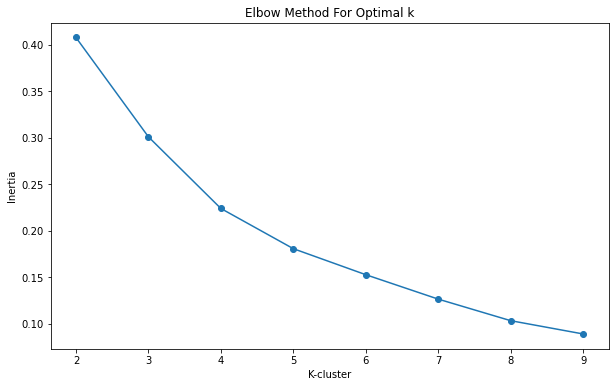

In [321]:
# Lista de valores de K
Kclusters = range(2, 10)


downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Ks:
    modelo = KMeans(n_clusters = K, random_state = 101)
    modelo.fit(downtown_grouped_clustering)
    valores_metrica.append(modelo.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("K-cluster")
plt.ylabel("Inertia")
plt.title('Elbow Method For Optimal k')
plt.show()

In [322]:
from sklearn.metrics import silhouette_score

for i in range(3,8):
    
  kmeans_ = KMeans(n_clusters=i).fit(downtown_grouped_clustering)
  labels_ = kmeans_.labels_
  coef = silhouette_score(downtown_grouped_clustering,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

N_cluster: 3, score: 0.40275654657612725
N_cluster: 4, score: 0.3480003307582759
N_cluster: 5, score: 0.13712546490268376
N_cluster: 6, score: 0.14564163633412897
N_cluster: 7, score: 0.07112400384205364


In [323]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

### Creating a new dataframe that includes the cluster + top 10 venues for each neighborhood + the neiborhood geocoordenates.

In [324]:
neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue  \
0                                         Berczy Park           Coffee Shop   
1   CN Tower, King and Spadina, Railway Lands, Har...      Airport Terminal   
2                                  Central Bay Street           Coffee Shop   
3                                            Christie         Grocery Store   
4                                Church and Wellesley           Coffee Shop   
5                      Commerce Court, Victoria Hotel           Coffee Shop   
6              First Canadian Place, Underground city           Coffee Shop   
7                            Garden District, Ryerson           Coffee Shop   
8   Harbourfront East, Union Station, Toronto Islands           Coffee Shop   
9           Kensington Market, Chinatown, Grange Park                  Café   
10                          Regent Park, Harbourfront           Coffee Shop   
11                           Richmond, Adelaide, King           Coffee Shop   
12                                           Rosedale                  Park   
13                                     St. James Town           Coffee Shop   
14                        St. James Town, Cabbagetown           Coffee Shop   
15           Toronto Dominion Centre, Design Exchange           Coffee Shop   
16                     University of Toronto, Harbord                  Café   

   2nd Most Common Venue  3rd Most Common Venue  \
0           Cocktail Bar         Farmers Market   
1                    Bar    Rental Car Location   
2         Sandwich Place                   Café   
3                   Café                   Park   
4    Japanese Restaurant       Sushi Restaurant   
5             Restaurant                   Café   
6                   Café                  Hotel   
7         Clothing Store         Cosmetics Shop   
8               Aquarium                  Hotel   
9            Coffee Shop  Vietnamese Restaurant   
10                   Pub                 Bakery   
11                  Café             Restaurant   
12            Playground                  Trail   
13                  Café              Gastropub   
14                  Café     Italian Restaurant   
15                 Hotel                   Café   
16             Bookstore    Japanese Restaurant   

            4th Most Common Venue 5th Most Common Venue  \
0                        Pharmacy                Bakery   
1                     Coffee Shop         Boat or Ferry   
2              Italian Restaurant          Burger Joint   
3                      Restaurant    Italian Restaurant   
4                      Restaurant           Yoga Studio   
5                           Hotel                   Gym   
6             Japanese Restaurant            Restaurant   
7                 Bubble Tea Shop                  Café   
8                            Café               Brewery   
9   Vegetarian / Vegan Restaurant    Mexican Restaurant   
10                           Park                  Café   
11                  Deli / Bodega        Clothing Store   
12                    Wings Joint      Department Store   
13                       Beer Bar          Cocktail Bar   
14                     Restaurant           Pizza Place   
15                     Restaurant           Salad Place   
16             Italian Restaurant                   Bar   

        6th Most Common Venue        7th Most Common Venue  \
0          Seafood Restaurant                     Beer Bar   
1                    Boutique              Harbor / Marina   
2                 Salad Place              Bubble Tea Shop   
3          Athletics & Sports                  Candy Store   
4                 Men's Store     Mediterranean Restaurant   
5          Italian Restaurant                Deli / Bodega   
6                         Gym                Deli / Bodega   
7   Middle Eastern Restaurant          Japanese Restaurant   
8              Scenic Lookout          Sporting Goods Shop   
9               

In [330]:
# adding clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_toronto_merged = df_toronto

# merging neighborhoods_venues_sorted with df_downtown_toronto to add latitude/longitude for each neighborhood

downtown_toronto_merged = downtown_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_toronto_merged.head() # checking the first columns!

PostalCode           Borough               Neighborhood   Latitude  \
0        M5A  Downtown Toronto  Regent Park, Harbourfront  43.654260   
1        M5B  Downtown Toronto   Garden District, Ryerson  43.657162   
2        M5C  Downtown Toronto             St. James Town  43.651494   
3        M4E      East Toronto                The Beaches  43.676357   
4        M5E  Downtown Toronto                Berczy Park  43.644771   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -79.360636             0.0           Coffee Shop                   Pub   
1 -79.378937             0.0           Coffee Shop        Clothing Store   
2 -79.375418             0.0           Coffee Shop                  Café   
3 -79.293031             NaN                   NaN                   NaN   
4 -79.373306             0.0           Coffee Shop          Cocktail Bar   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery                  Park                  Café   
1        Cosmetics Shop       Bubble Tea Shop                  Café   
2             Gastropub              Beer Bar          Cocktail Bar   
3                   NaN                   NaN                   NaN   
4        Farmers Market              Pharmacy                Bakery   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0             Breakfast Spot               Theater  Gym / Fitness Center   
1  Middle Eastern Restaurant   Japanese Restaurant           Pizza Place   
2             Cosmetics Shop                  Park                   Gym   
3                        NaN                   NaN                   NaN   
4         Seafood Restaurant              Beer Bar            Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0           Event Space             Playground  
1             Bookstore           Burger Joint  
2        Farmers Market     Italian Restaurant  
3                   NaN                    NaN  
4           Cheese Shop     Belgian Restaurant

### Map to visualize Clustered neighborhoods

Finally, let's visualize the resulting clusters

In [331]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_toronto_merged['Latitude'], downtown_toronto_merged['Longitude'], downtown_toronto_merged['Neighborhood'], downtown_toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float

# 5. Examine Clusters

We can now examine each cluster and determine how categories of discriminating locations

### Cluster 1

In [332]:
cluster_1=downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 0, 
                            downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]
cluster_1

Borough  Cluster Labels 1st Most Common Venue  \
0   Downtown Toronto             0.0           Coffee Shop   
1   Downtown Toronto             0.0           Coffee Shop   
2   Downtown Toronto             0.0           Coffee Shop   
4   Downtown Toronto             0.0           Coffee Shop   
5   Downtown Toronto             0.0           Coffee Shop   
7   Downtown Toronto             0.0           Coffee Shop   
10  Downtown Toronto             0.0           Coffee Shop   
13  Downtown Toronto             0.0           Coffee Shop   
16  Downtown Toronto             0.0           Coffee Shop   
27  Downtown Toronto             0.0                  Café   
30  Downtown Toronto             0.0                  Café   
32  Downtown Toronto             0.0      Airport Terminal   
35  Downtown Toronto             0.0           Coffee Shop   
36  Downtown Toronto             0.0           Coffee Shop   
37  Downtown Toronto             0.0           Coffee Shop   

   2nd Most Common Venue  3rd Most Common Venue  \
0                    Pub                 Bakery   
1         Clothing Store         Cosmetics Shop   
2                   Café              Gastropub   
4           Cocktail Bar         Farmers Market   
5         Sandwich Place                   Café   
7                   Café             Restaurant   
10              Aquarium                  Hotel   
13                 Hotel                   Café   
16            Restaurant                   Café   
27             Bookstore    Japanese Restaurant   
30           Coffee Shop  Vietnamese Restaurant   
32                   Bar    Rental Car Location   
35                  Café     Italian Restaurant   
36                  Café                  Hotel   
37   Japanese Restaurant       Sushi Restaurant   

            4th Most Common Venue 5th Most Common Venue  \
0                            Park                  Café   
1                 Bubble Tea Shop                  Café   
2                        Beer Bar          Cocktail Bar   
4                        Pharmacy                Bakery   
5              Italian Restaurant          Burger Joint   
7                   Deli / Bodega        Clothing Store   
10                           Café               Brewery   
13                     Restaurant           Salad Place   
16                          Hotel                   Gym   
27             Italian Restaurant                   Bar   
30  Vegetarian / Vegan Restaurant    Mexican Restaurant   
32                    Coffee Shop         Boat or Ferry   
35                     Restaurant           Pizza Place   
36            Japanese Restaurant            Restaurant   
37                     Restaurant           Yoga Studio   

        6th Most Common Venue     7th Most Common Venue  \
0              Breakfast Spot                   Theater   
1   Middle Eastern Restaurant       Japanese Restaurant   
2              Cosmetics Shop                      Park   
4          Seafood Restaurant                  Beer Bar   
5                 Salad Place           Bubble Tea Shop   
7                         Gym           Thai Restaurant   
10             Scenic Lookout       Sporting Goods Shop   
13         Seafood Restaurant       Japanese Restaurant   
16         Italian Restaurant             Deli / Bodega   
27                     Bakery               Yoga Studio   
30              Grocery Store                    Bakery   
32                   Boutique           Harbor / Marina   
35                     Bakery                       Pub   
36                        Gym             Deli / Bodega   
37                Men's Store  Mediterranean Restaurant   

    8th Most Common Venue 9th Most Common Venue   10th Most Common Venue  
0    Gym / Fitness Center           Event Space               Playground  
1             Pizza Place             Bookstore             Burger Joint  
2                     Gym        Farmers Market       Italian Restaurant  
4            

### Cluster 2

In [333]:
cluster_2=downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 1, 
                            downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]
cluster_2

Borough  Cluster Labels 1st Most Common Venue  \
33  Downtown Toronto             1.0                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
33            Playground                 Trail           Wings Joint   

   5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
33      Department Store     Electronics Store  Eastern European Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
33   Dumpling Restaurant            Donut Shop       Doner Restaurant

### Cluster 3

In [334]:
cluster_3=downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 2, 
                            downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]
cluster_3

Borough  Cluster Labels 1st Most Common Venue  \
6  Downtown Toronto             2.0         Grocery Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6                  Café                  Park            Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6    Italian Restaurant    Athletics & Sports           Candy Store   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
6            Baby Store             Nightclub            Coffee Shop

### Thank you

This notebook is part of a course on **Coursera** called _Applied Data Science Capstone_. 